## Step 1: Reading and Understanding the Data

In [ ]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing dataset
pd01 = pd.read_csv('day.csv')
pd01 = pd01.drop(['instant','atemp'],axis=1)

In [ ]:
#Let's explore the top 5 rows
pd01.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [ ]:
pd01.shape

(731, 14)

In [ ]:
pd01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 80.1+ KB


In [ ]:
def season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

pd01.season = pd01.season.apply(season)

In [ ]:
def weather(x):
    if x==1:
        return "Clear"
    elif x==2:
        return "Cloudy"
    elif x==3:
        return "Light Rain"
    else:
        return "Heavy Rain"

pd01.weathersit = pd01.weathersit.apply(weather)

In [ ]:
pd01.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,spring,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600


In [ ]:
pd01.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Converting date to Pandas datetime format
pd01['dteday'] = pd.to_datetime(pd01['dteday'])

In [ ]:
# Deriving "days since the show started"
from datetime import date

d0 = pd.to_datetime("2018-01-01")
d1 = pd01.dteday
delta = d1 - d0
pd01['day']= delta

In [ ]:
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,spring,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557 days
1,2011-01-02,spring,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556 days
2,2011-01-03,spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555 days
3,2011-01-04,spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554 days
4,2011-01-05,spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,1,12,0,4,1,Cloudy,0.254167,0.652917,0.350133,247,1867,2114,-1831 days
727,2012-12-28,spring,1,12,0,5,1,Cloudy,0.253333,0.590000,0.155471,644,2451,3095,-1830 days
728,2012-12-29,spring,1,12,0,6,0,Cloudy,0.253333,0.752917,0.124383,159,1182,1341,-1829 days
729,2012-12-30,spring,1,12,0,0,0,Clear,0.255833,0.483333,0.350754,364,1432,1796,-1828 days


In [ ]:
# Cleaning days
pd01['day'] = pd01['day'].astype(str)
pd01['day'] = pd01['day'].apply(lambda x: x.split(" ")[0])
pd01['day'] = pd01['day'].astype(int)
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,spring,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557
1,2011-01-02,spring,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556
2,2011-01-03,spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555
3,2011-01-04,spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554
4,2011-01-05,spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,1,12,0,4,1,Cloudy,0.254167,0.652917,0.350133,247,1867,2114,-1831
727,2012-12-28,spring,1,12,0,5,1,Cloudy,0.253333,0.590000,0.155471,644,2451,3095,-1830
728,2012-12-29,spring,1,12,0,6,0,Cloudy,0.253333,0.752917,0.124383,159,1182,1341,-1829
729,2012-12-30,spring,1,12,0,0,0,Clear,0.255833,0.483333,0.350754,364,1432,1796,-1828


## Step 2: Visualising the Data

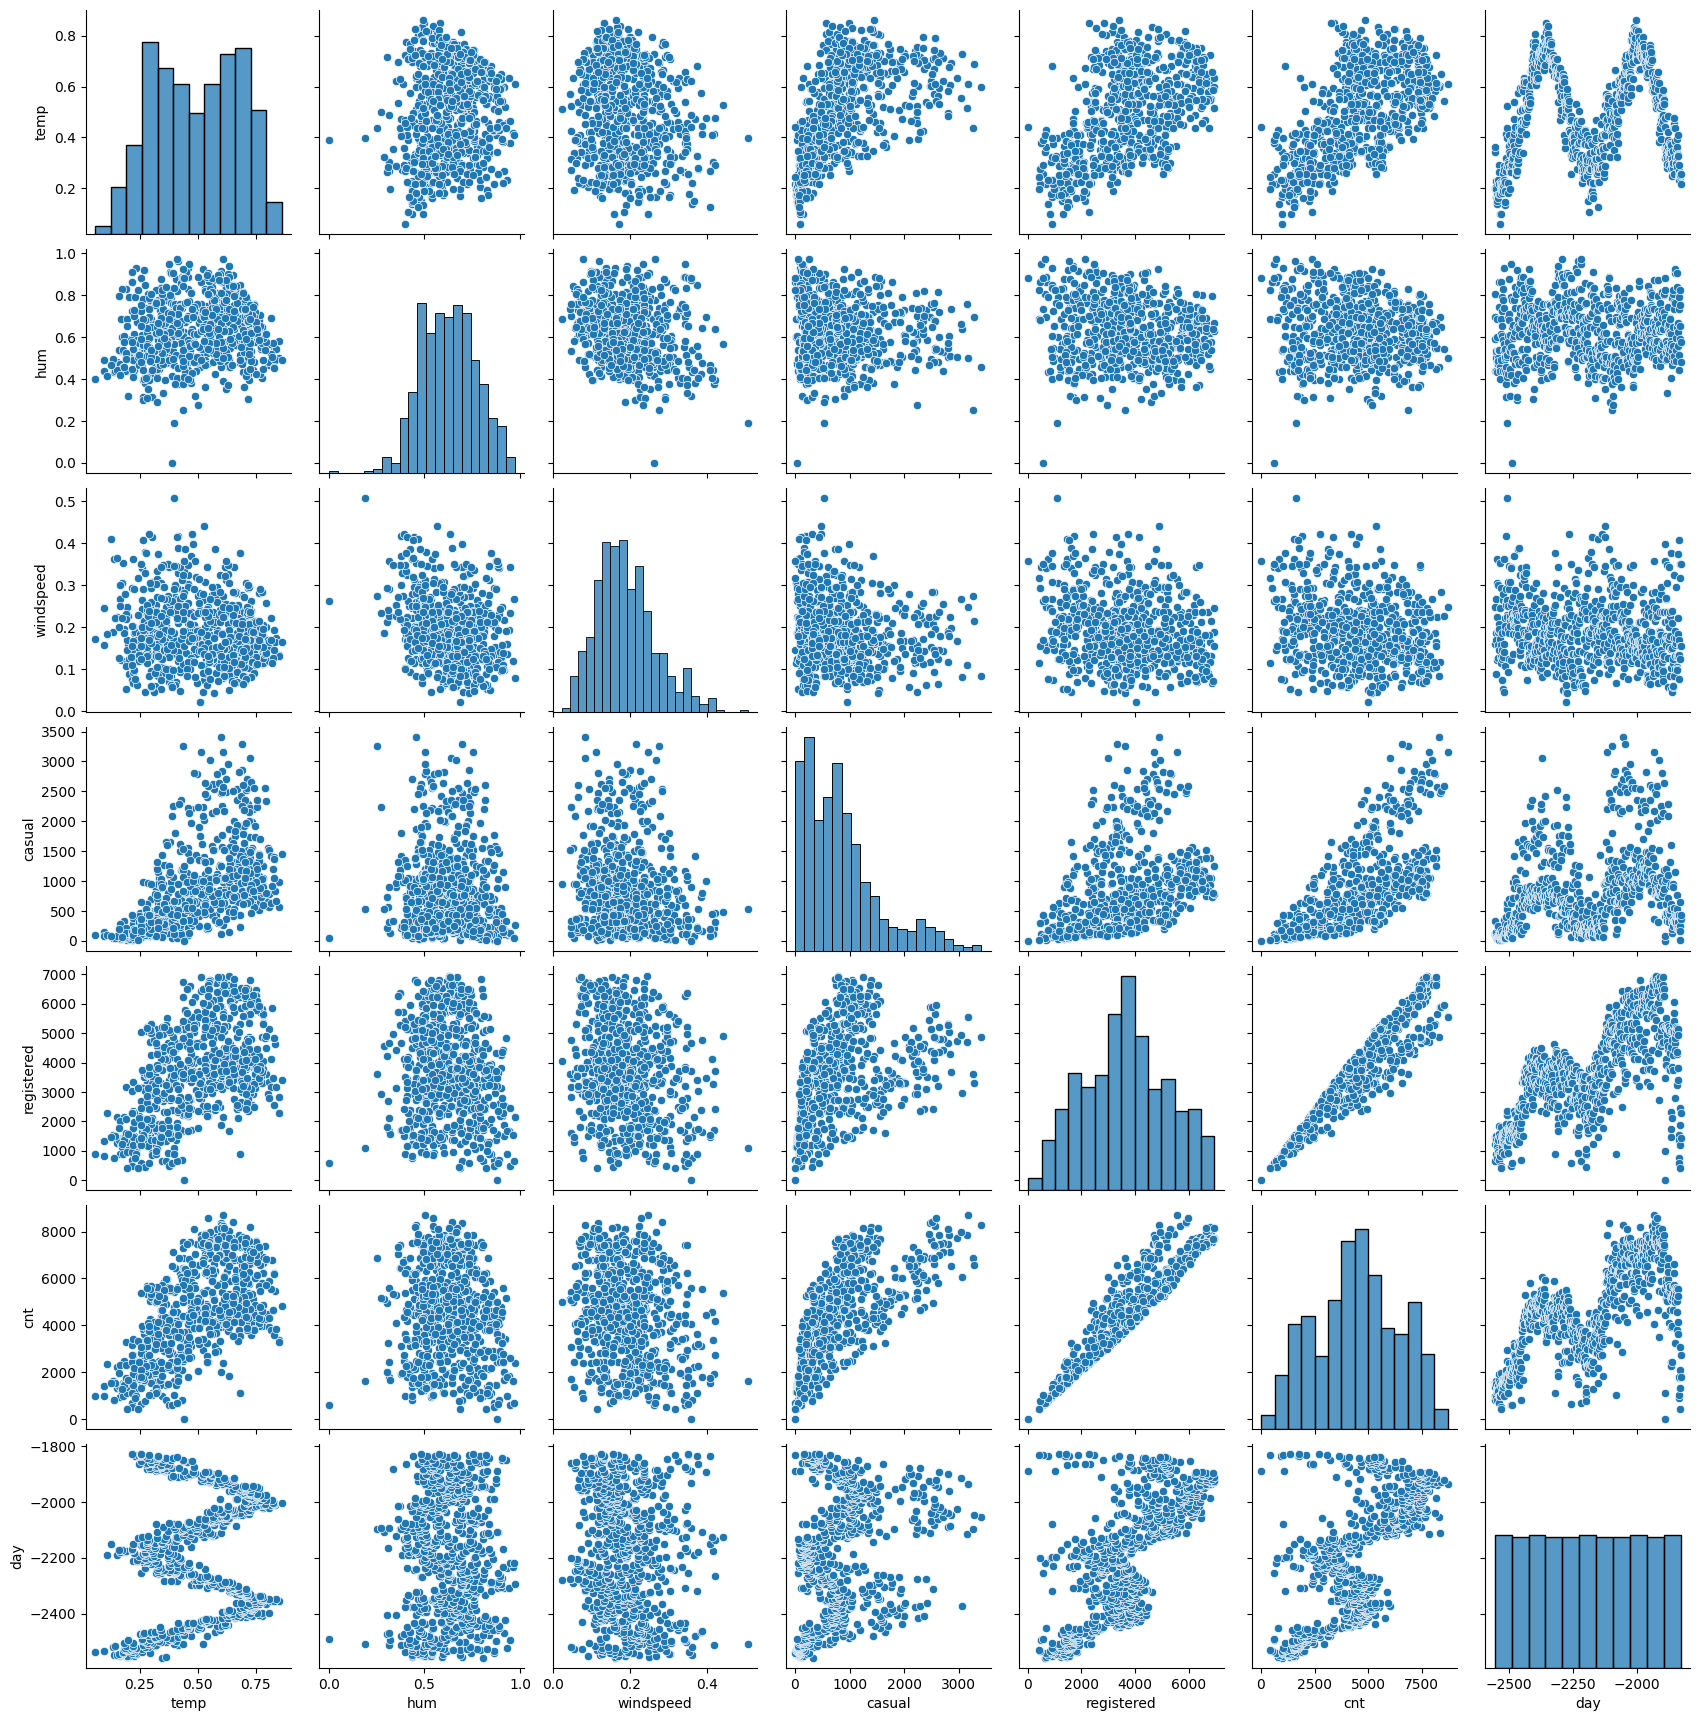

In [ ]:
#Let's make a pairplot of all the numeric variables
num = ['temp','hum','windspeed','casual','registered','cnt','day']
sns.pairplot(pd01[num])
plt.show()

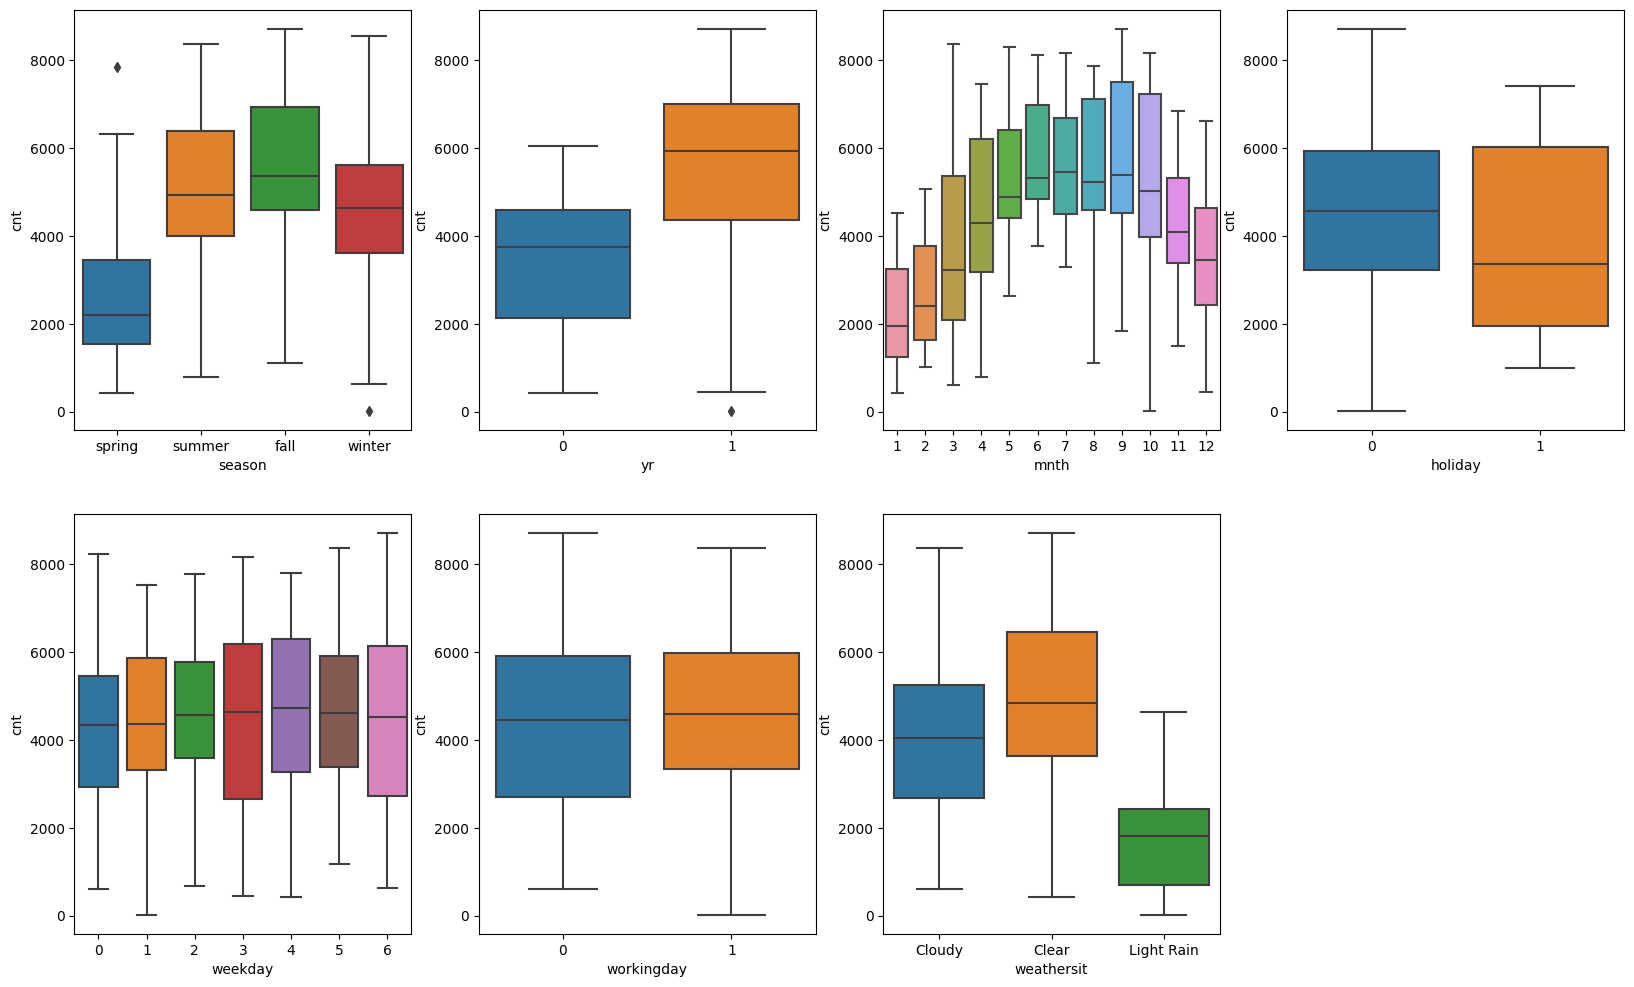

In [ ]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = pd01)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = pd01)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = pd01)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = pd01)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = pd01)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = pd01)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = pd01)
plt.show()

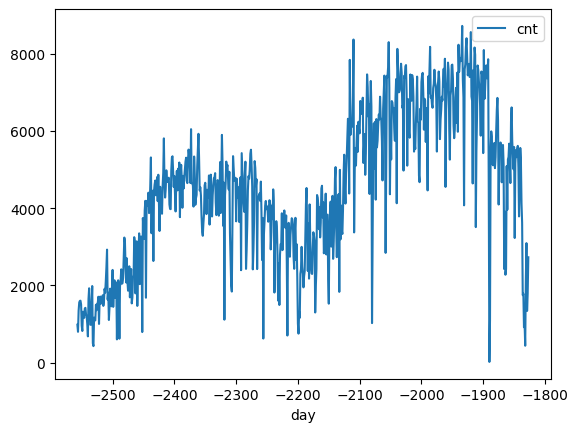

In [ ]:
# days vs Count
pd01.plot.line(x='day', y='cnt')
plt.show()

## Step 3: Data Preparation

In [ ]:
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,spring,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557
1,2011-01-02,spring,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556
2,2011-01-03,spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555
3,2011-01-04,spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554
4,2011-01-05,spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,1,12,0,4,1,Cloudy,0.254167,0.652917,0.350133,247,1867,2114,-1831
727,2012-12-28,spring,1,12,0,5,1,Cloudy,0.253333,0.590000,0.155471,644,2451,3095,-1830
728,2012-12-29,spring,1,12,0,6,0,Cloudy,0.253333,0.752917,0.124383,159,1182,1341,-1829
729,2012-12-30,spring,1,12,0,0,0,Clear,0.255833,0.483333,0.350754,364,1432,1796,-1828


#### The variable "season" has 4 levels. We need to convert these levels into integer as well.

In [ ]:
season_dummy = pd.get_dummies(pd01['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We can drop the `fall` column, as the type of fall can be identified with just the last three columns where —
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [ ]:
# Let's drop the first column from pd01 df using 'drop_first = True'
season_dummy = pd.get_dummies(pd01['season'], drop_first = True)
# Add the results to the original pd01 dataframe
pd01 = pd.concat([pd01, season_dummy], axis = 1)
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2011-01-01,spring,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557,1,0,0
1,2011-01-02,spring,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556,1,0,0
2,2011-01-03,spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555,1,0,0
3,2011-01-04,spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554,1,0,0
4,2011-01-05,spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,1,12,0,4,1,Cloudy,0.254167,0.652917,0.350133,247,1867,2114,-1831,1,0,0
727,2012-12-28,spring,1,12,0,5,1,Cloudy,0.253333,0.590000,0.155471,644,2451,3095,-1830,1,0,0
728,2012-12-29,spring,1,12,0,6,0,Cloudy,0.253333,0.752917,0.124383,159,1182,1341,-1829,1,0,0
729,2012-12-30,spring,1,12,0,0,0,Clear,0.255833,0.483333,0.350754,364,1432,1796,-1828,1,0,0


In [ ]:
# Drop 'season' as we have created the dummies for it
pd01.drop(['season'], axis = 1, inplace = True)

In [ ]:
pd01

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2011-01-01,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557,1,0,0
1,2011-01-02,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556,1,0,0
2,2011-01-03,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555,1,0,0
3,2011-01-04,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554,1,0,0
4,2011-01-05,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,12,0,4,1,Cloudy,0.254167,0.652917,0.350133,247,1867,2114,-1831,1,0,0
727,2012-12-28,1,12,0,5,1,Cloudy,0.253333,0.590000,0.155471,644,2451,3095,-1830,1,0,0
728,2012-12-29,1,12,0,6,0,Cloudy,0.253333,0.752917,0.124383,159,1182,1341,-1829,1,0,0
729,2012-12-30,1,12,0,0,0,Clear,0.255833,0.483333,0.350754,364,1432,1796,-1828,1,0,0


In [ ]:
pd.set_option('display.max_columns', None)
pd01.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2011-01-01,0,1,0,6,0,Cloudy,0.344167,0.805833,0.160446,331,654,985,-2557,1,0,0
1,2011-01-02,0,1,0,0,0,Cloudy,0.363478,0.696087,0.248539,131,670,801,-2556,1,0,0
2,2011-01-03,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349,-2555,1,0,0
3,2011-01-04,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562,-2554,1,0,0
4,2011-01-05,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600,-2553,1,0,0


#### The variable "weathersit" has 3 levels. We need to convert these levels into integer as well.

In [ ]:
weather_dummy = pd.get_dummies(pd01['weathersit'])
weather_dummy.head()

,Clear,Cloudy,Light Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


We can drop the `weathersit` column
- `00` will correspond to `Clear`
- `10` will correspond to `Cloudy`
- `01` will correspond to `Light Rain`

In [ ]:
# Let's drop the first column from pd01 df using 'drop_first = True'
weather_dummy = pd.get_dummies(pd01['weathersit'], drop_first = True)
# Add the results to the original pd01 dataframe
pd01 = pd.concat([pd01, weather_dummy], axis = 1)
# Drop 'season' as we have created the dummies for it
pd01.drop(['weathersit'], axis = 1, inplace = True)
pd01

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
0,2011-01-01,0,1,0,6,0,0.344167,0.805833,0.160446,331,654,985,-2557,1,0,0,1,0
1,2011-01-02,0,1,0,0,0,0.363478,0.696087,0.248539,131,670,801,-2556,1,0,0,1,0
2,2011-01-03,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349,-2555,1,0,0,0,0
3,2011-01-04,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562,-2554,1,0,0,0,0
4,2011-01-05,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600,-2553,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,12,0,4,1,0.254167,0.652917,0.350133,247,1867,2114,-1831,1,0,0,1,0
727,2012-12-28,1,12,0,5,1,0.253333,0.590000,0.155471,644,2451,3095,-1830,1,0,0,1,0
728,2012-12-29,1,12,0,6,0,0.253333,0.752917,0.124383,159,1182,1341,-1829,1,0,0,1,0
729,2012-12-30,1,12,0,0,0,0.255833,0.483333,0.350754,364,1432,1796,-1828,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(pd01, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'dummy' and 0 and 1 variables
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
653,2019-10-16,1,10,0,3,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,653,0,0,1,0,0
576,2019-07-31,1,7,0,3,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,576,0,0,0,0,0
426,2019-03-03,1,3,0,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,426,1,0,0,1,0
728,2019-12-30,1,12,0,1,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,728,1,0,0,0,0
482,2019-04-28,1,4,0,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,482,0,1,0,1,0


In [ ]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,6.536204,0.023483,2.998043,0.667319,0.536606,0.648573,0.317963,0.263887,0.532247,0.515061,-2188.632094,0.244618,0.246575,0.248532,0.348337,0.027397
std,0.500412,3.469497,0.151581,2.037395,0.471635,0.227231,0.148691,0.165339,0.215368,0.229943,0.225338,209.967041,0.430282,0.431440,0.432585,0.476910,0.163398
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2557.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.338036,0.534994,0.199179,0.094154,0.360662,0.356765,-2370.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.530654,0.653499,0.294121,0.216615,0.535000,0.519903,-2184.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.755689,0.406058,0.354615,0.703529,0.691498,-2004.500000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1828.000000,1.000000,1.000000,1.000000,1.000000,1.000000


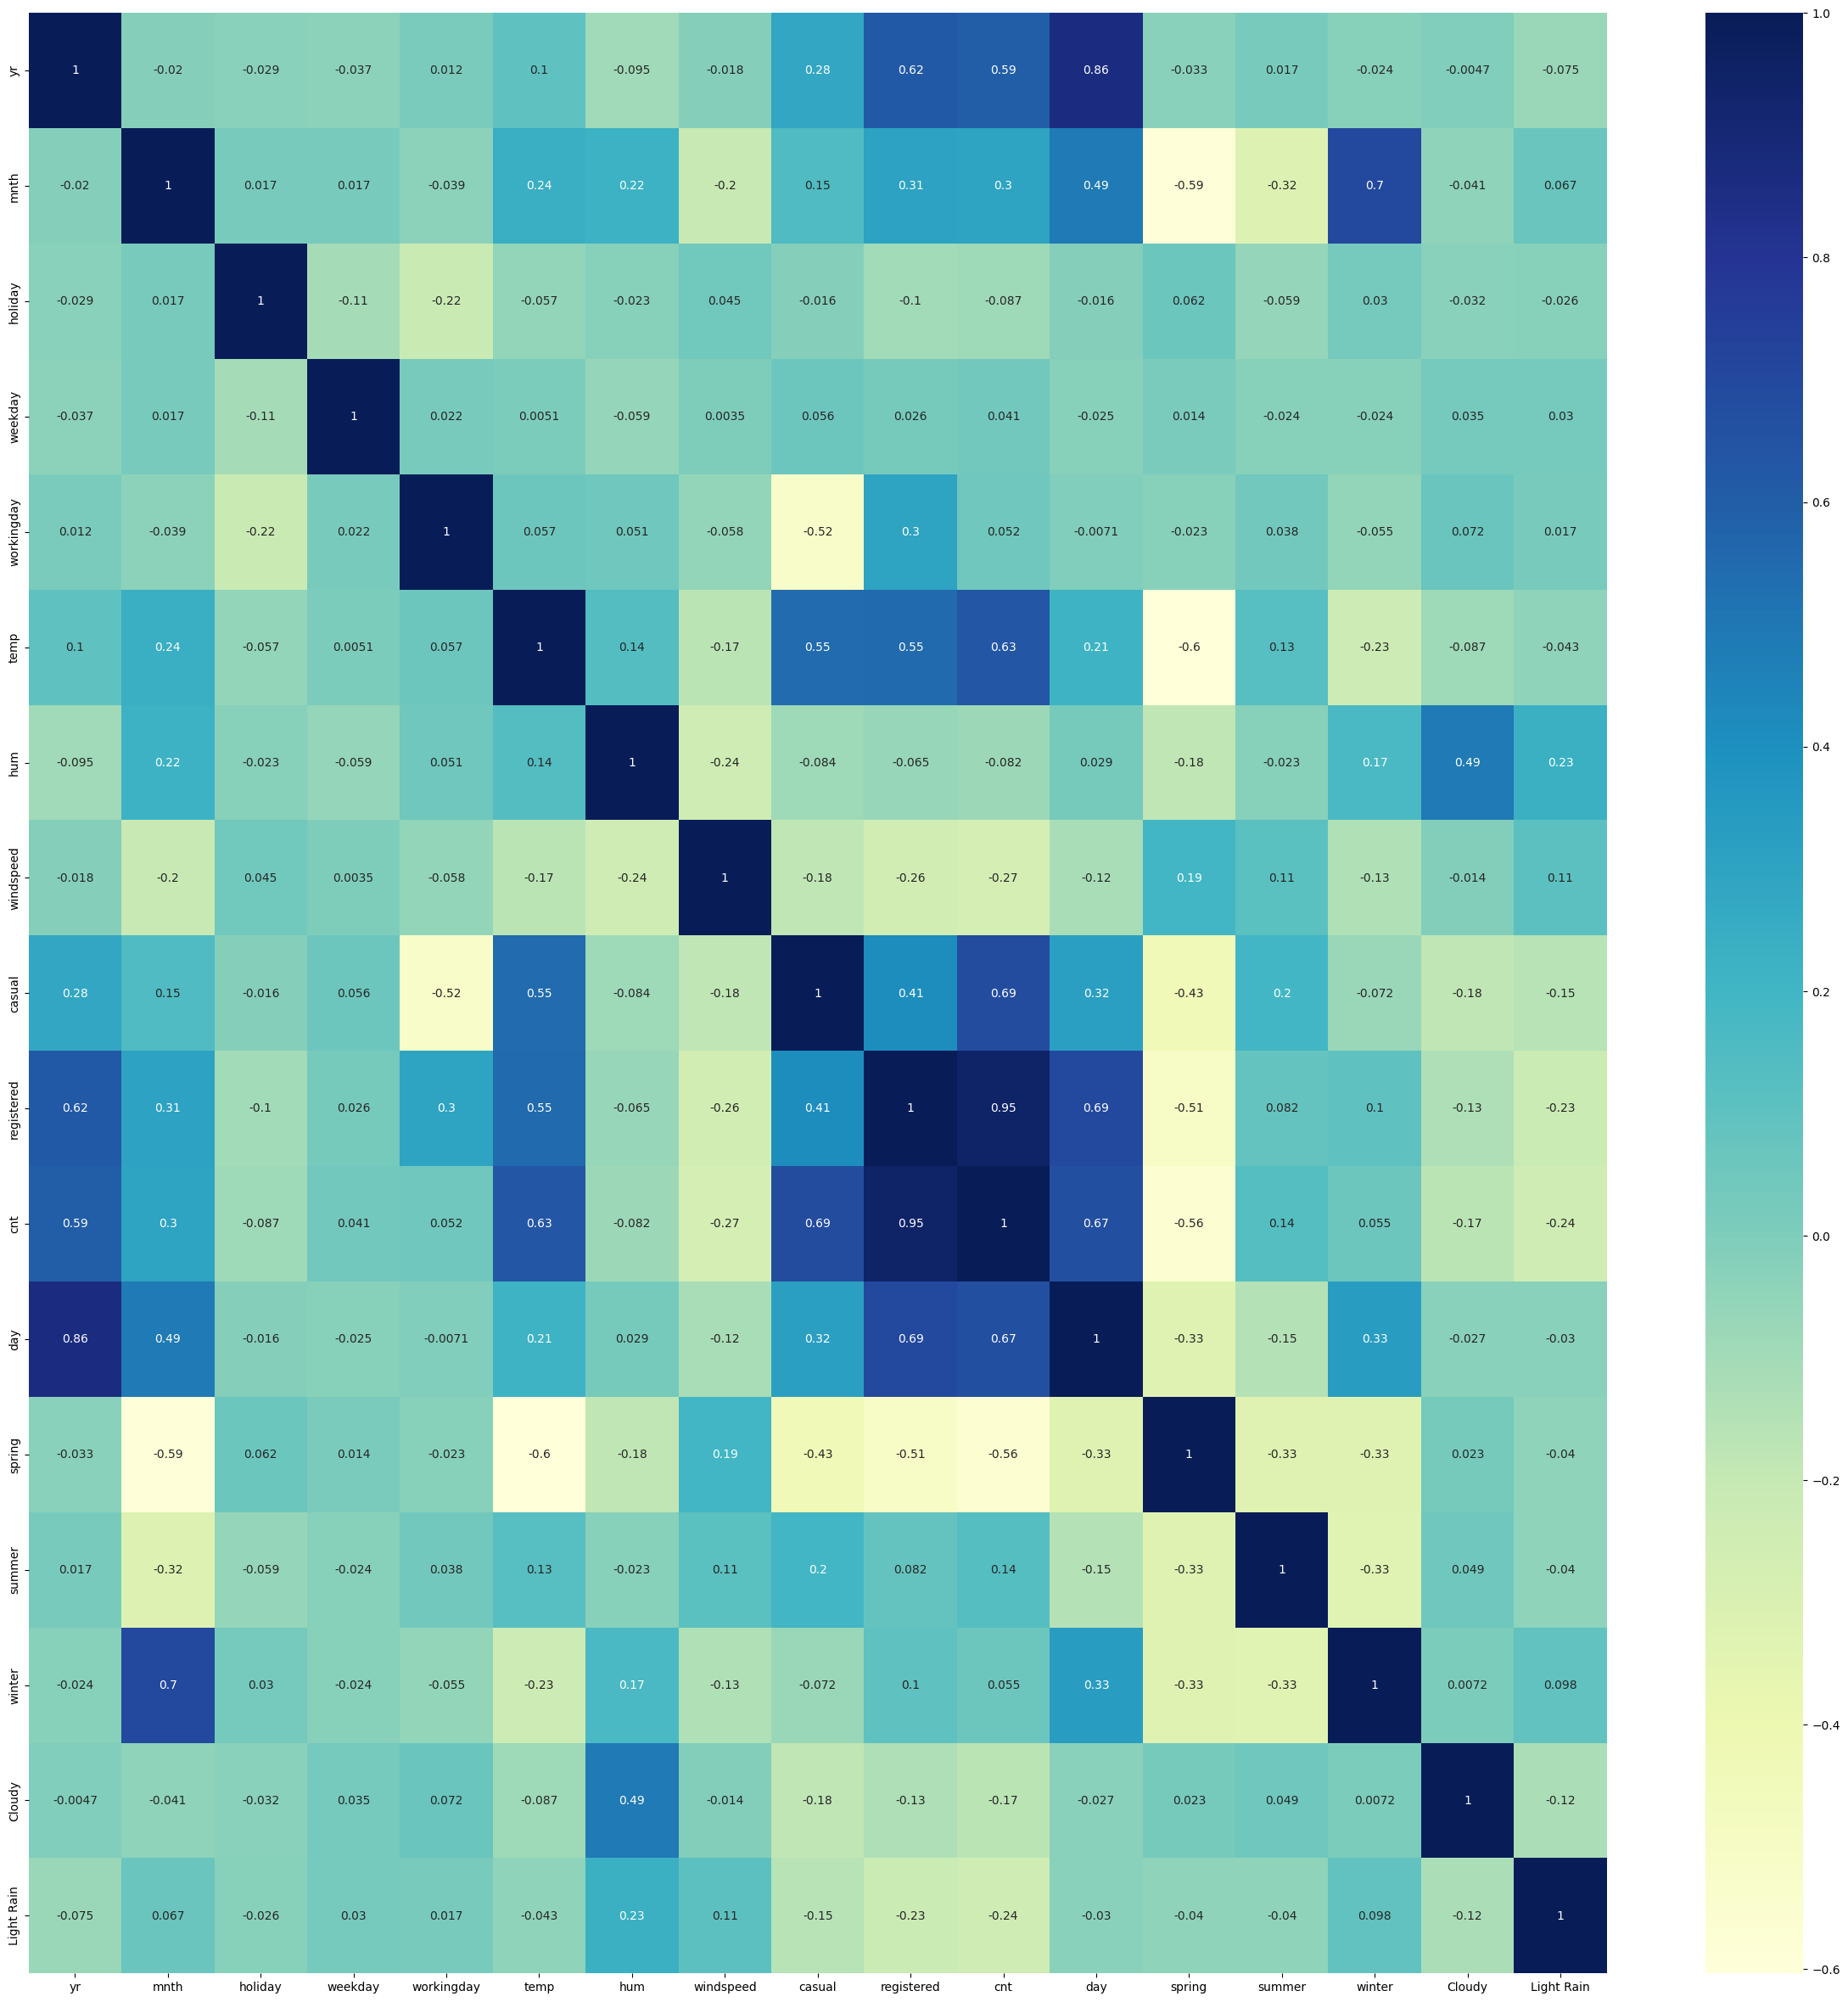

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()

### Running the model


In [ ]:
# Putting feature variable to X
X = df_train[['temp','hum','windspeed','summer','mnth','Light Rain','holiday','registered']]
# Putting response variable to y
y = df_train['cnt']
# fit the model to the training data
lm.fit(X,y)
# Add Constant
X = sm.add_constant(X)
# create a fitted model in one line
lm8 = sm.OLS(y,X).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     722.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.54e-270
Time:                        14:06:55   Log-Likelihood:                 682.64
No. Observations:                 511   AIC:                            -1347.
Df Residuals:                     502   BIC:                            -1309.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0574      0.019      3.066      0.0

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.42
8,registered,1.78
1,temp,1.53
5,mnth,1.39
2,hum,1.24
4,summer,1.21
3,windspeed,1.19
6,Light Rain,1.14
7,holiday,1.02


In [ ]:
lm8.params

const         0.057376
temp          0.168545
hum          -0.095371
windspeed    -0.058407
summer        0.031556
mnth          0.002220
Light Rain   -0.033436
holiday       0.013115
registered    0.800350
dtype: float64

## Step 6: Residual Analysis of the train data

In [ ]:
y_pred = lm8.predict(X)

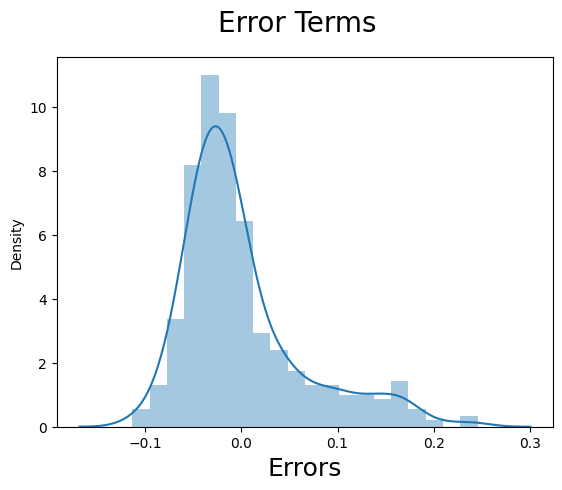

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 7: Making Predictions Using the Final Model

In [ ]:
# Apply scaler() to all the columns except the 'dummy' and 0 and 1 variables
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,6.481818,0.040909,2.995455,0.722727,0.547256,0.478544,0.402560,0.238919,0.500985,0.502339,-2199.822727,0.254545,0.263636,0.231818,0.313636,0.031818
std,0.500809,3.418274,0.198531,1.931469,0.448673,0.245004,0.207138,0.188521,0.192711,0.238758,0.233036,214.201609,0.436599,0.441609,0.422956,0.465029,0.175916
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2554.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.327648,0.334581,0.268160,0.093061,0.318506,0.349951,-2386.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.552688,0.469943,0.383521,0.210673,0.496239,0.508072,-2207.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.767486,0.618927,0.511858,0.303073,0.660193,0.664900,-2018.250000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1827.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Making predictions using the model
X_test = df_test[['temp','hum','windspeed','summer','mnth','Light Rain','holiday','registered']]
y_test = df_test['cnt']
X_test = sm.add_constant(X_test)
y_test_pred = lm8.predict(X_test)

## Step 8: Model Evaluation

In [ ]:
# calculating R-sqaured of test data
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004202187920590879
r_square_value : 0.9222665000824133


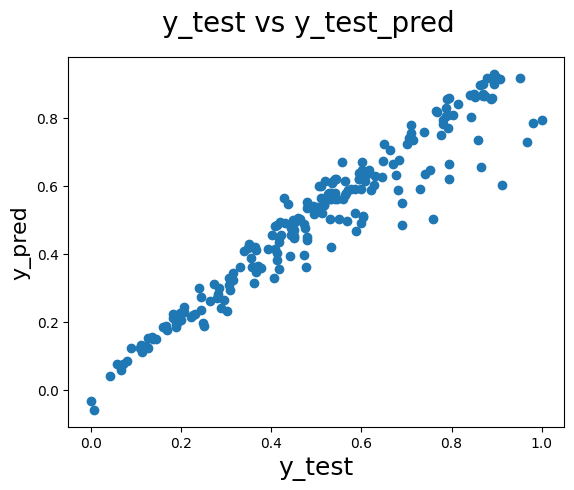

In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

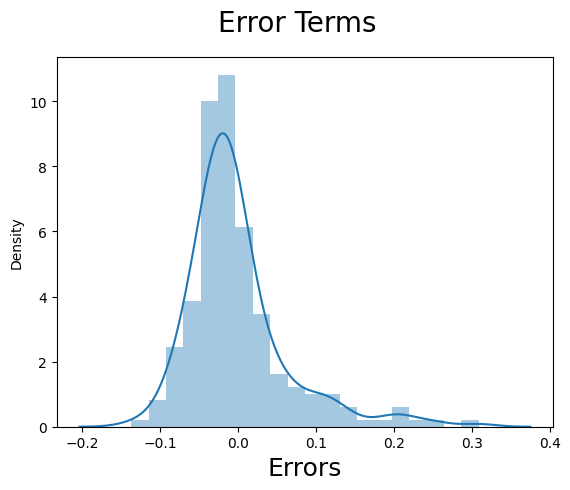

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

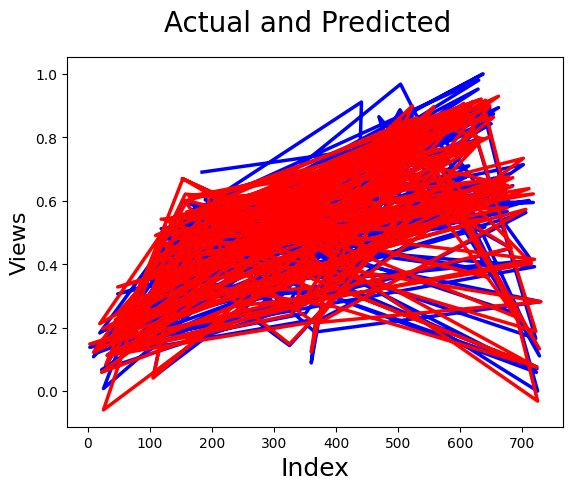

In [ ]:
#Actual vs Predicted
fig = plt.figure()
plt.plot(y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)
plt.show()

In [50]:
coefficients = lm8.params
print(coefficients)


const         0.057376
temp          0.168545
hum          -0.095371
windspeed    -0.058407
summer        0.031556
mnth          0.002220
Light Rain   -0.033436
holiday       0.013115
registered    0.800350
dtype: float64


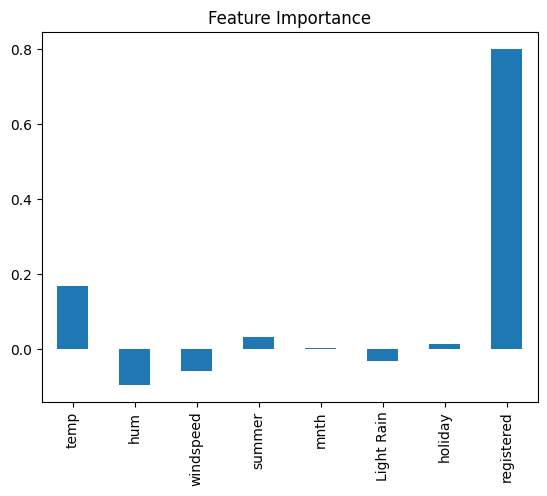

In [51]:
coefficients[1:].plot(kind='bar')
plt.title('Feature Importance')
plt.show()


#R-squared


In [54]:
print("R-squared:", lm8.rsquared)
print("Adjusted R-squared:", lm8.rsquared_adj)


R-squared: 0.9201342316542239
Adjusted R-squared: 0.9188614704056857


#Weight plot


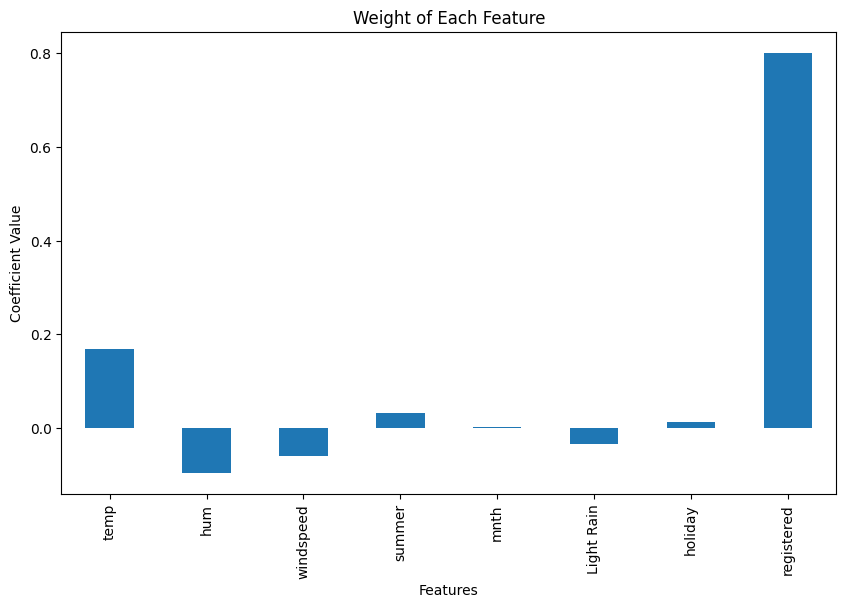

In [53]:
# Plotting the coefficients as a bar chart
coefficients = lm8.params[1:]  # Excluding the intercept
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Weight of Each Feature')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

#Effect plot


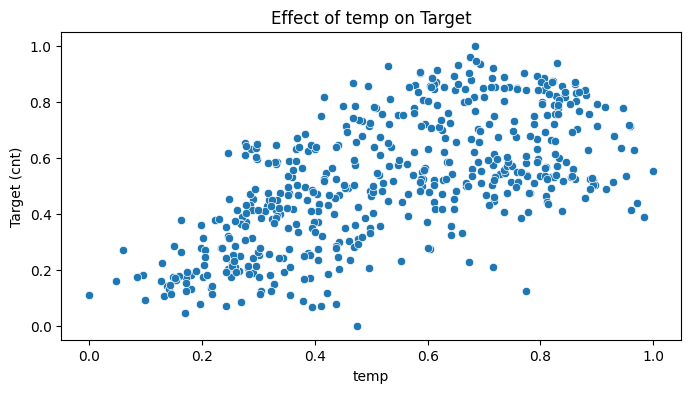

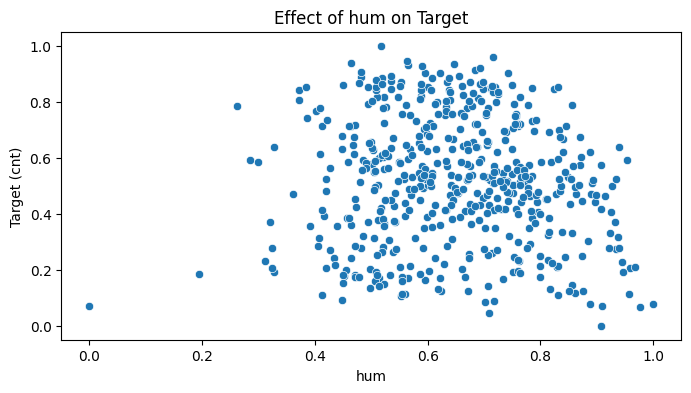

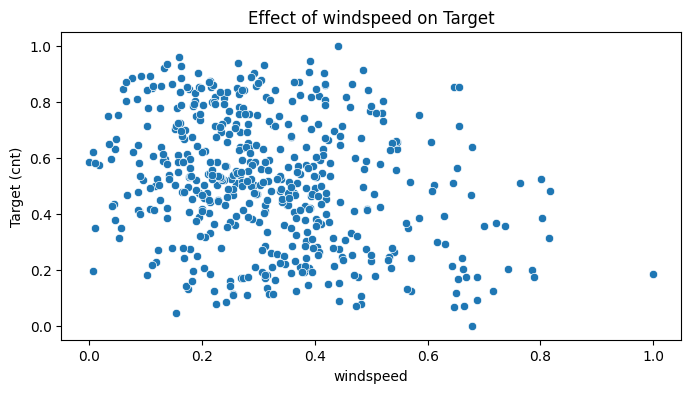

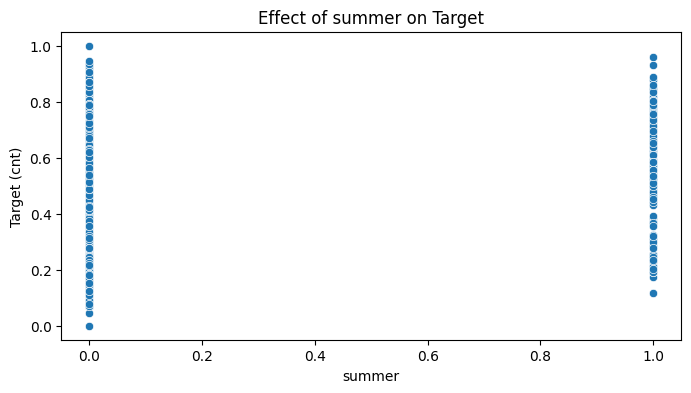

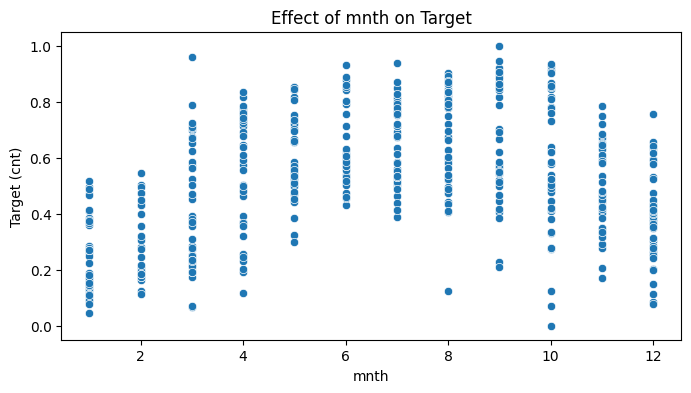

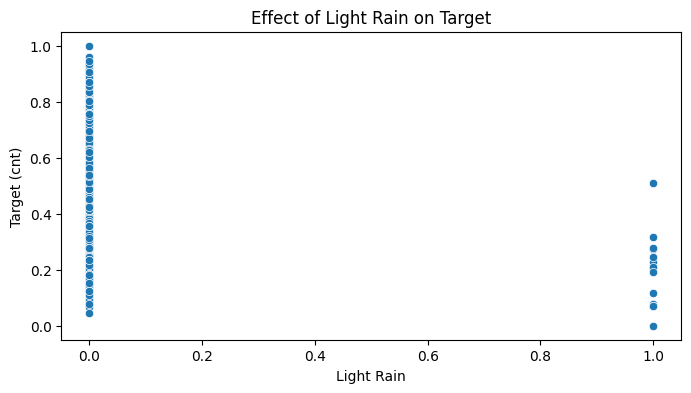

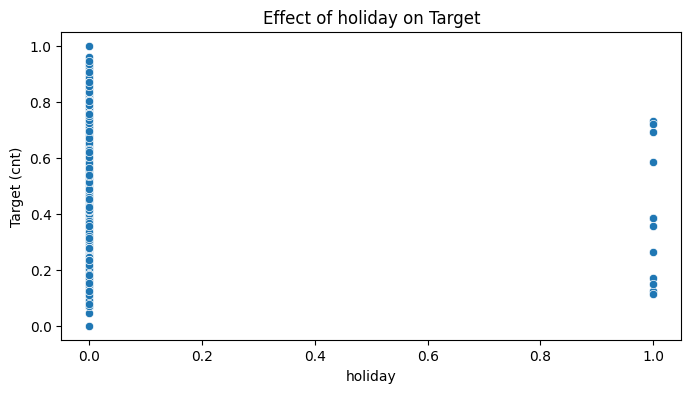

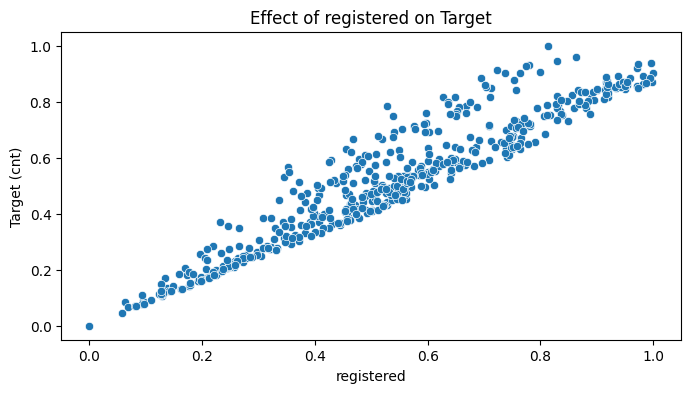

In [57]:
features = ['temp', 'hum', 'windspeed', 'summer', 'mnth', 'Light Rain', 'holiday', 'registered']

# Plotting each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_train, x=feature, y='cnt')
    plt.title(f'Effect of {feature} on Target')
    plt.xlabel(feature)
    plt.ylabel('Target (cnt)')
    plt.show()

